In [17]:
import pandas as pd 
import matplotlib.pyplot as plt

# Cargar el archivo CSV depurado desde la ruta correcta
file_path = '/Users/issacmoto/Desktop/Tripletent/Proyectos Tripletent/Myprojectvideogames/videogames/videogames_cleaned.csv'
df = pd.read_csv(file_path)

# Verificar que los datos se hayan cargado correctamente
print(df.head())

                       name  year_of_release         genre  na_sales  \
0                Wii Sports             2006        Sports  1.000000   
1         Super Mario Bros.             1985      Platform  0.703095   
2            Mario Kart Wii             2008        Racing  0.379110   
3         Wii Sports Resort             2009        Sports  0.377418   
4  Pokemon Red/Pokemon Blue             1996  Role-Playing  0.272485   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  ...  \
0  1.000000  0.368885     0.799432          76.0         8.0      E  ...   
1  0.123619  0.666341     0.072848          71.0         7.5      E  ...   
2  0.440608  0.370841     0.311258          82.0         8.3      E  ...   
3  0.377417  0.320939     0.279092          80.0         8.0      E  ...   
4  0.306975  1.000000     0.094607          71.0         7.5      E  ...   

   platform_SCD  platform_SNES  platform_TG16  platform_WS  platform_Wii  \
0         False          False    

1. Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
year_of_release: Originalmente, esta columna estaba en formato float64, lo cual no es apropiado para representar años. Decidimos convertirla a Int64 porque los años deben representarse como enteros. Además, el tipo Int64 permite manejar valores faltantes (NaN), lo que fue útil antes de la imputación de los valores ausentes.

user_score: Esta columna estaba en formato object, probablemente porque contenía tanto números como el valor "tbd" (to be determined). Convertimos la columna a float64 después de reemplazar "tbd" con NaN, lo cual permitió tratar los valores como puntuaciones numéricas para análisis posteriores.

2. Si es necesario, elige la manera de tratar los valores ausentes.
Columna name y genre: Decidimos eliminar las filas que contenían valores ausentes en estas columnas porque estas son características clave para cada videojuego. No tendría sentido analizar o hacer cálculos sobre juegos sin nombre o género.

Columnas critic_score y user_score: Imputamos los valores ausentes utilizando la mediana. La mediana es una elección robusta cuando hay valores extremos en los datos, ya que no se ve afectada por outliers, a diferencia de la media. De este modo, evitamos eliminar una gran cantidad de datos faltantes que podrían ser importantes para el análisis.

Columna rating: Los valores ausentes en esta columna fueron imputados con el valor más frecuente (la moda). La razón de esta decisión es que las clasificaciones ESRB siguen un patrón claro y utilizar el valor más común es una forma razonable de llenar los datos faltantes sin sesgar demasiado el análisis.

3. Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
Eliminación de filas en name y genre: No hay una manera intuitiva de imputar nombres o géneros de juegos faltantes sin hacer suposiciones arbitrarias, por lo que optamos por eliminar esas filas para no comprometer la calidad del análisis.

Imputación de la mediana en critic_score y user_score: Elegimos la mediana porque, en general, es una opción más segura en el caso de datos numéricos con posibles outliers, como es el caso de las puntuaciones. La imputación de la media podría haber sesgado el análisis si hubiera habido puntuaciones extremadamente altas o bajas.

Imputación de la moda en rating: Dado que la clasificación ESRB tiene un conjunto limitado de categorías (por ejemplo, "E", "T", "M"), la imputación de la moda es una elección sensata. Además, en muchos casos, la mayoría de los juegos comparten una clasificación común, por lo que este enfoque minimiza el riesgo de error.

4. ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
user_score y critic_score: Los valores ausentes en estas columnas podrían deberse a que algunos juegos no recibieron suficientes reseñas de usuarios o críticos en el momento de la recopilación de los datos. Es común que los juegos menos populares o más recientes carezcan de suficientes reseñas para generar una puntuación confiable.

rating: Los valores ausentes en la clasificación ESRB podrían ser debido a que algunos juegos, especialmente aquellos lanzados en plataformas menores o en mercados más pequeños, no fueron evaluados por el sistema ESRB.

5. Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Manejo de "tbd" en user_score: Decidimos reemplazar los valores "tbd" con NaN (valores nulos) porque "tbd" indica que la puntuación aún no estaba disponible en el momento de la recopilación de los datos. Después de convertir estos valores a NaN, imputamos los valores ausentes con la mediana, siguiendo un enfoque similar al que usamos para los otros valores ausentes en la columna.


Paso 3. Analiza los datos
#Aqui comienzo con el analisis de los datos ya depurados de "videogames.py"

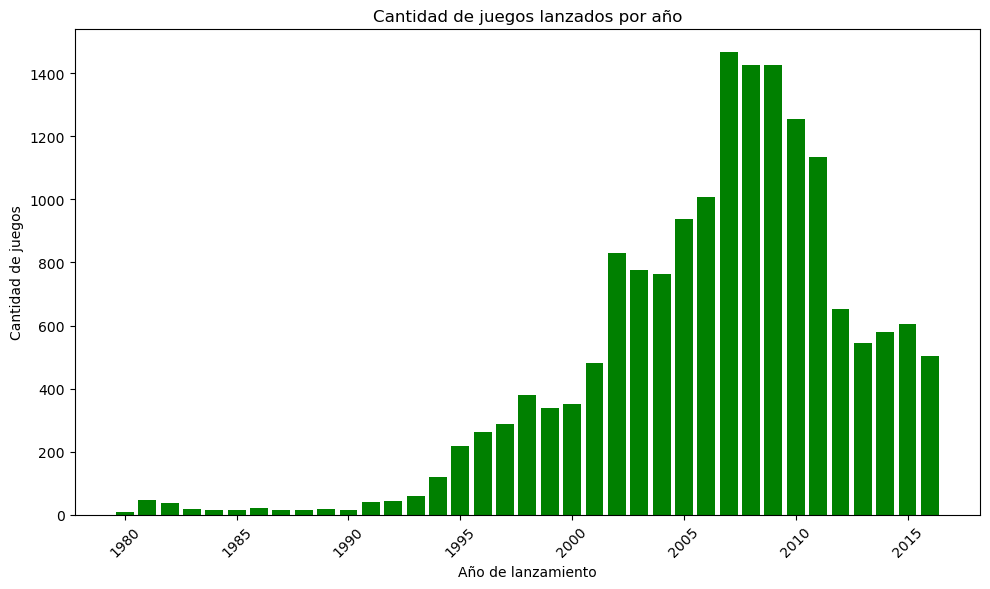

In [18]:
# Contar cuántos juegos fueron lanzados por año
#games_per_year = df['year_of_release'].value_counts().sort_index()

# Mostrar los datos
#print(games_per_year)

# Contar cuántos juegos fueron lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Graficar la cantidad de juegos lanzados por año
plt.figure(figsize=(10, 6))
plt.bar(games_per_year.index, games_per_year.values, color='green')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


¿Son significativos los datos de cada período?



Períodos anteriores a 1995: No son muy significativos en términos de volumen de datos, por lo que las conclusiones basadas en estos años pueden no ser representativas.
1995-2010: Es el período más significativo en términos de cantidad de datos, y es donde se puede realizar el análisis más representativo.
Después de 2010: Aunque sigue habiendo muchos lanzamientos, el contexto cambia, y deberíamos considerar que muchas plataformas digitales no están incluidas.
En resumen, los datos de los años anteriores a 1995 pueden no ser tan significativos para análisis comparativos debido al bajo número de lanzamientos. El período entre 1995 y 2010 es el más representativo, mientras que los años posteriores requieren un análisis contextual (plataformas digitales, cambios en el modelo de negocio de los videojuegos).

Paso 1: Calcular ventas totales por plataforma

In [19]:
# Seleccionar las columnas de plataformas
platform_columns = [col for col in df.columns if col.startswith('platform_')]

# Calcular las ventas totales por plataforma
platform_sales = {}
for platform in platform_columns:
    platform_sales[platform] = (df[platform] * df['total_sales']).sum()

# Convertir los resultados en un DataFrame para visualizar mejor
platform_sales_df = pd.DataFrame(list(platform_sales.items()), columns=['platform', 'total_sales']).sort_values(by='total_sales', ascending=False)

# Mostrar las plataformas con mayores ventas totales
print("Plataformas con mayores ventas totales:")
print(platform_sales_df.head(10))


Plataformas con mayores ventas totales:
         platform  total_sales
15   platform_PS2    57.753073
16   platform_PS3    41.601532
3     platform_DS    38.553587
25   platform_Wii    35.332599
27  platform_X360    33.245708
14    platform_PS    33.063805
18   platform_PSP    16.373351
1    platform_3DS    15.255793
10   platform_NES    13.930296
22  platform_SNES    13.846620


Paso 2: Comparar la evolución de las ventas por año en las plataformas más populares

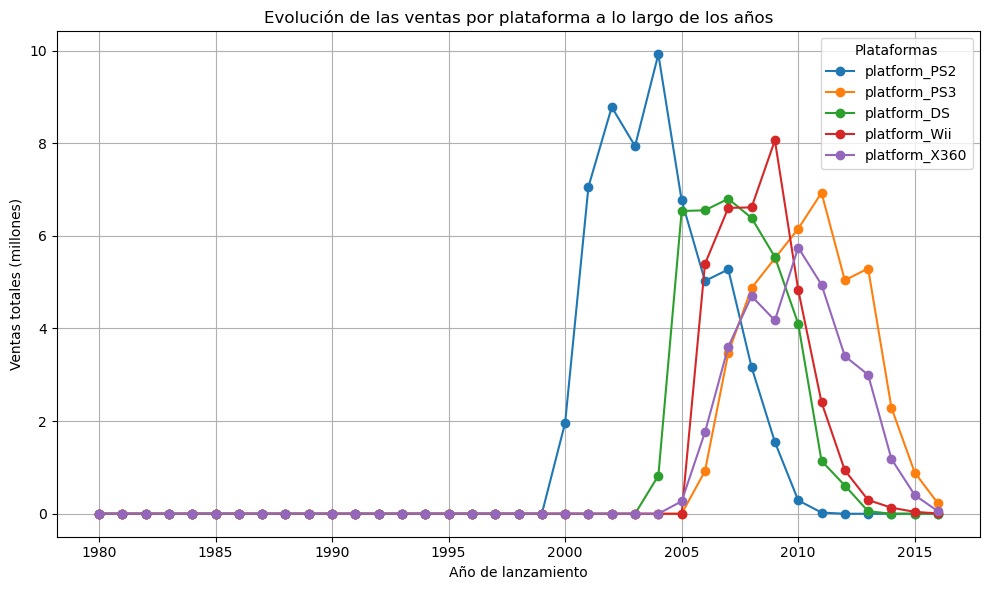

In [22]:


# Seleccionar las plataformas más populares (las primeras 5 por ejemplo)
top_platforms = platform_sales_df.head(5)['platform']

# Crear una lista de las columnas de las plataformas más populares
top_platform_columns = top_platforms.tolist()

# Filtrar los datos para las plataformas más populares
filtered_df = df[['year_of_release', 'total_sales'] + top_platform_columns]

# Crear un DataFrame que sume las ventas por año para cada plataforma
platform_sales_per_year = {}
for platform in top_platform_columns:
    platform_sales_per_year[platform] = filtered_df.groupby('year_of_release')[[platform, 'total_sales']].apply(
        lambda x: (x[platform] * x['total_sales']).sum())

# Convertir los resultados en un DataFrame
platform_sales_per_year_df = pd.DataFrame(platform_sales_per_year)

# Graficar la evolución de las ventas por plataforma y año
platform_sales_per_year_df.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Evolución de las ventas por plataforma a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusiones sobre las plataformas que solían ser populares pero ya no tienen ventas:

PlayStation 2 (PS2) y Nintendo DS (DS): Ambas consolas fueron extremadamente populares, pero ya no tienen ventas después de 2010. Esto puede deberse al avance hacia nuevas generaciones de consolas y plataformas digitales.
Nintendo Wii: Aunque fue un fenómeno en su momento, sus ventas han disminuido drásticamente después de 2010, y la plataforma ya no tiene ventas actuales.


Observaciones clave:

PlayStation 2 (PS2):

Fue una de las plataformas más populares en términos de ventas totales. Las ventas aumentaron rápidamente a principios de los 2000, alcanzando su punto máximo alrededor de 2005, y luego disminuyeron gradualmente.

Nintendo DS (DS):

La DS tuvo un gran crecimiento a partir de 2005 y se mantuvo con ventas fuertes durante varios años, antes de una caída rápida alrededor de 2010.

Nintendo Wii:

Tuvo un gran éxito entre 2006 y 2010, con un claro pico de ventas alrededor de 2008. A partir de ahí, las ventas disminuyeron rápidamente.

PlayStation 3 (PS3) y Xbox 360 (X360):

Ambas consolas tuvieron ventas similares, creciendo rápidamente a partir de 2006 y alcanzando su punto máximo alrededor de 2010. Luego, las ventas de ambas plataformas disminuyeron a medida que surgieron nuevas generaciones de consolas.


In [23]:
# Encontrar las columnas de plataformas
platform_columns = [col for col in df.columns if col.startswith('platform_')]

# Crear un DataFrame para almacenar el último año de ventas para cada plataforma
last_year_sales = {}

# Iterar sobre cada columna de plataforma y encontrar el último año con ventas
for platform in platform_columns:
    # Filtrar las ventas solo para la plataforma actual
    platform_data = df[df[platform] == 1]
    
    # Verificar el último año con ventas (si la plataforma tiene datos)
    if not platform_data.empty:
        last_year = platform_data['year_of_release'].max()
        total_sales = platform_data['total_sales'].sum()
        last_year_sales[platform] = {'last_year': last_year, 'total_sales': total_sales}

# Convertir el diccionario en un DataFrame
last_year_sales_df = pd.DataFrame(last_year_sales).T  # .T para transponer el DataFrame

# Ordenar por el último año de ventas
last_year_sales_df = last_year_sales_df.sort_values(by='last_year')

# Mostrar las plataformas que no tienen ventas recientes (por ejemplo, ventas antes de 2015)
platforms_no_recent_sales = last_year_sales_df[last_year_sales_df['last_year'] < 2015]
print("Plataformas que ya no tienen ventas recientes:")
print(platforms_no_recent_sales)


Plataformas que ya no tienen ventas recientes:
               last_year  total_sales
platform_GG       1992.0     0.003914
platform_SCD      1994.0     0.085371
platform_GEN      1994.0     1.001970
platform_NES      1994.0    13.930296
platform_3DO      1995.0     0.009785
platform_TG16     1995.0     0.015656
platform_PCFX     1996.0     0.002935
platform_NG       1996.0     0.140900
platform_SNES     1999.0    13.846620
platform_SAT      1999.0     3.199233
platform_WS       2001.0     0.138943
platform_PS       2007.0    33.063805
platform_GBA      2007.0    12.495175
platform_GC       2007.0     7.165073
platform_N64      2007.0     8.541753
platform_GB       2007.0    13.519814
platform_XB       2008.0     7.578414
platform_DC       2008.0     1.052760
platform_PS2      2011.0    57.753073
platform_DS       2013.0    38.553587
